<a href="https://colab.research.google.com/github/laiscris/projetointegrador3/blob/main/ProjetoIntegradorIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparativo de combustíveis e previsão simples de preços

**Links**
* [Ciclo de Vida de Modelos de Machine Learning - Oracle](https://www.oracle.com/br/a/ocom/docs/data-science-lifecycle-ebook-pt-br.pdf)
* [Técnicas de Visualização de Dados - DataCamp](https://www.datacamp.com/pt/blog/data-visualization-techniques)
* [Quando Usar Cada Gráfico - Piktochart](https://piktochart.com/pt-br/blog/tipos-de-graficos/)

In [ ]:
!pip -q install plotly

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import warnings
import itertools
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Pré-Processamento

* Limpeza
* Identificação de valores nulos e duplicados
* Identificação de outliers
* Escolha das variáveis
* Criação de novas colunas


In [ ]:
precos= '/content/mensal-brasil-desde-jan2013.xlsx'
df=pd.read_excel(precos, skiprows=16)

df.tail() # Tem dados vazios (-) nas últimas colunas

,MÊS,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
953,2025-07-01,GASOLINA COMUM,17232,R$/l,6.21,0.429,4.99,8.99,-,0.069,-,-,-,-,-
954,2025-07-01,GLP,6217,R$/13kg,108.45,11.967,75.00,156.00,-,0.110,-,-,-,-,-
955,2025-07-01,GNV,1531,R$/m³,4.66,0.452,3.99,6.49,-,0.097,-,-,-,-,-
956,2025-07-01,OLEO DIESEL,6911,R$/l,5.97,0.406,5.24,8.19,-,0.068,-,-,-,-,-
957,2025-07-01,OLEO DIESEL S10,11693,R$/l,6.03,0.424,5.29,8.99,-,0.070,-,-,-,-,-


In [ ]:
round(df.describe(), 2)

,MÊS,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,COEF DE VARIAÇÃO REVENDA
count,958,958.00,958.00,958.00,958.00,958.00,958.00
mean,2019-06-23 04:29:03.632567808,16061.90,14.84,1.56,10.58,22.32,0.09
min,2013-01-01 00:00:00,252.00,1.76,0.11,1.26,2.60,0.04
25%,2016-04-08 12:00:00,9149.50,2.97,0.23,2.39,4.19,0.06
50%,2019-08-01 00:00:00,15949.00,4.03,0.34,3.15,5.89,0.07
75%,2022-09-01 00:00:00,21911.50,6.05,0.46,4.99,8.49,0.11
max,2025-07-01 00:00:00,42745.00,113.51,12.94,84.99,170.00,0.22
std,NaN,9780.88,27.12,3.07,18.76,41.12,0.03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   MÊS                            958 non-null    datetime64[ns]
 1   PRODUTO                        958 non-null    object        
 2   NÚMERO DE POSTOS PESQUISADOS   958 non-null    int64         
 3   UNIDADE DE MEDIDA              958 non-null    object        
 4   PREÇO MÉDIO REVENDA            958 non-null    float64       
 5   DESVIO PADRÃO REVENDA          958 non-null    float64       
 6   PREÇO MÍNIMO REVENDA           958 non-null    float64       
 7   PREÇO MÁXIMO REVENDA           958 non-null    float64       
 8   MARGEM MÉDIA REVENDA           958 non-null    object        
 9   COEF DE VARIAÇÃO REVENDA       958 non-null    float64       
 10  PREÇO MÉDIO DISTRIBUIÇÃO       958 non-null    object        
 11  DESVIO PADRÃO DISTR

In [ ]:
df.isnull().sum() #sem valores nulos

,0
MÊS,0
PRODUTO,0
NÚMERO DE POSTOS PESQUISADOS,0
UNIDADE DE MEDIDA,0
PREÇO MÉDIO REVENDA,0
DESVIO PADRÃO REVENDA,0
PREÇO MÍNIMO REVENDA,0
PREÇO MÁXIMO REVENDA,0
MARGEM MÉDIA REVENDA,0
COEF DE VARIAÇÃO REVENDA,0


In [ ]:
df_filtrado = df.query("PRODUTO in ['ETANOL HIDRATADO', 'GASOLINA COMUM', 'OLEO DIESEL']")  # deixa apenas os 3 combustíveis

In [ ]:
df_filtrado.head()

,MÊS,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2013-01-01,ETANOL HIDRATADO,39584,R$/l,1.956,0.244,1.479,3.120,0.266,0.125,1.69,0.222,1.2199,2.4745,0.131
1,2013-01-01,GASOLINA COMUM,41990,R$/l,2.763,0.148,2.229,3.899,0.386,0.054,2.377,0.109,2.0803,2.8949,0.046
4,2013-01-01,OLEO DIESEL,32749,R$/l,2.156,0.114,1.869,2.950,0.23,0.053,1.926,0.08,1.3984,2.57,0.042
6,2013-02-01,ETANOL HIDRATADO,32570,R$/l,2.000,0.239,1.480,3.150,0.267,0.120,1.733,0.217,1.2999,2.6006,0.125
7,2013-02-01,GASOLINA COMUM,34664,R$/l,2.887,0.146,2.390,3.899,0.424,0.051,2.463,0.106,2.095,2.9653,0.043


In [ ]:
# Verificar o tipo de cada coluna
print(df_filtrado.dtypes) # As últimas colunas possuem muitos valores vazios - excluir

MÊS                              datetime64[ns]
PRODUTO                                  object
NÚMERO DE POSTOS PESQUISADOS              int64
UNIDADE DE MEDIDA                        object
PREÇO MÉDIO REVENDA                     float64
DESVIO PADRÃO REVENDA                   float64
PREÇO MÍNIMO REVENDA                    float64
PREÇO MÁXIMO REVENDA                    float64
MARGEM MÉDIA REVENDA                     object
COEF DE VARIAÇÃO REVENDA                float64
PREÇO MÉDIO DISTRIBUIÇÃO                 object
DESVIO PADRÃO DISTRIBUIÇÃO               object
PREÇO MÍNIMO DISTRIBUIÇÃO                object
PREÇO MÁXIMO DISTRIBUIÇÃO                object
COEF DE VARIAÇÃO DISTRIBUIÇÃO            object
dtype: object


In [ ]:
# Transformando a coluna 'MÊS' para o formato datetime
df_filtrado['MÊS'] = pd.to_datetime(df_filtrado['MÊS'])

# Separar a coluna mes em mes e ano
df_filtrado['ANO_SEP'] = df_filtrado['MÊS'].dt.year
df_filtrado['MÊS_SEP'] = df_filtrado['MÊS'].dt.month

/tmp/ipython-input-612467885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['MÊS'] = pd.to_datetime(df_filtrado['MÊS'])
/tmp/ipython-input-612467885.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['ANO_SEP'] = df_filtrado['MÊS'].dt.year
/tmp/ipython-input-612467885.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [ ]:
df_filtrado.head()

,MÊS,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,ANO_SEP,MÊS_SEP
0,2013-01-01,ETANOL HIDRATADO,39584,R$/l,1.956,0.244,1.479,3.120,0.266,0.125,1.69,0.222,1.2199,2.4745,0.131,2013,1
1,2013-01-01,GASOLINA COMUM,41990,R$/l,2.763,0.148,2.229,3.899,0.386,0.054,2.377,0.109,2.0803,2.8949,0.046,2013,1
4,2013-01-01,OLEO DIESEL,32749,R$/l,2.156,0.114,1.869,2.950,0.23,0.053,1.926,0.08,1.3984,2.57,0.042,2013,1
6,2013-02-01,ETANOL HIDRATADO,32570,R$/l,2.000,0.239,1.480,3.150,0.267,0.120,1.733,0.217,1.2999,2.6006,0.125,2013,2
7,2013-02-01,GASOLINA COMUM,34664,R$/l,2.887,0.146,2.390,3.899,0.424,0.051,2.463,0.106,2.095,2.9653,0.043,2013,2


### Salvando os arquivos

In [ ]:
# Deixando apenas colunas que possuem todos os valores preenchidos até o final do dataset
df_tratado = df_filtrado.loc[:, ['MÊS', 'PRODUTO', 'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA', 'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA', 'PREÇO MÁXIMO REVENDA', 'COEF DE VARIAÇÃO REVENDA', 'ANO_SEP', 'MÊS_SEP']].copy()

# Salvando o dataset com todos os dados
df_tratado.to_csv('/content/precos_tratado.csv', index=False)

In [ ]:
df_tratado = pd.read_csv('/content/precos_tratado.csv')
df_tratado.head()

,MÊS,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,COEF DE VARIAÇÃO REVENDA,ANO_SEP,MÊS_SEP
0,2013-01-01,ETANOL HIDRATADO,39584,R$/l,1.956,0.244,1.479,3.120,0.125,2013,1
1,2013-01-01,GASOLINA COMUM,41990,R$/l,2.763,0.148,2.229,3.899,0.054,2013,1
2,2013-01-01,OLEO DIESEL,32749,R$/l,2.156,0.114,1.869,2.950,0.053,2013,1
3,2013-02-01,ETANOL HIDRATADO,32570,R$/l,2.000,0.239,1.480,3.150,0.120,2013,2
4,2013-02-01,GASOLINA COMUM,34664,R$/l,2.887,0.146,2.390,3.899,0.051,2013,2


In [ ]:
# Transformando a coluna 'MÊS' para o formato datetime de novo porque perde o formato quando salva em arquivo
df_tratado['MÊS'] = pd.to_datetime(df_tratado['MÊS'])

In [ ]:
df_tratado.dtypes

,0
MÊS,datetime64[ns]
PRODUTO,object
NÚMERO DE POSTOS PESQUISADOS,int64
UNIDADE DE MEDIDA,object
PREÇO MÉDIO REVENDA,float64
DESVIO PADRÃO REVENDA,float64
PREÇO MÍNIMO REVENDA,float64
PREÇO MÁXIMO REVENDA,float64
COEF DE VARIAÇÃO REVENDA,float64
ANO_SEP,int64


In [ ]:
# Criando outro dataset sem os dados do período da pandemia (2020 a 2022)
# Definir intervalo a remover
inicio = pd.to_datetime('2019-03-01') # Início e fim não inclusos
fim = pd.to_datetime('2024-05-01')

# Transformando a coluna 'MÊS' para o formato datetime
df_filtrado['MÊS'] = pd.to_datetime(df_filtrado['MÊS'])

# Filtrar removendo esse período
df_tratado_sp = df_tratado[(df_tratado["MÊS"] < inicio) | (df_tratado["MÊS"] > fim)].copy()

# Salvar o resultado
df_tratado_sp.to_csv("/content/precos_sem_pandemia.csv", index=False)

/tmp/ipython-input-1533407701.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['MÊS'] = pd.to_datetime(df_filtrado['MÊS'])


In [ ]:
df_tratado_sp = pd.read_csv('/content/precos_sem_pandemia.csv')
df_tratado_sp.head()

,MÊS,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,COEF DE VARIAÇÃO REVENDA,ANO_SEP,MÊS_SEP
0,2013-01-01,ETANOL HIDRATADO,39584,R$/l,1.956,0.244,1.479,3.120,0.125,2013,1
1,2013-01-01,GASOLINA COMUM,41990,R$/l,2.763,0.148,2.229,3.899,0.054,2013,1
2,2013-01-01,OLEO DIESEL,32749,R$/l,2.156,0.114,1.869,2.950,0.053,2013,1
3,2013-02-01,ETANOL HIDRATADO,32570,R$/l,2.000,0.239,1.480,3.150,0.120,2013,2
4,2013-02-01,GASOLINA COMUM,34664,R$/l,2.887,0.146,2.390,3.899,0.051,2013,2


In [ ]:
# Transformando a coluna 'MÊS' para o formato datetime de novo porque perde o formato quando salva em arquivo
df_tratado_sp['MÊS'] = pd.to_datetime(df_tratado_sp['MÊS'])

In [ ]:
df_tratado_sp.dtypes

,0
MÊS,datetime64[ns]
PRODUTO,object
NÚMERO DE POSTOS PESQUISADOS,int64
UNIDADE DE MEDIDA,object
PREÇO MÉDIO REVENDA,float64
DESVIO PADRÃO REVENDA,float64
PREÇO MÍNIMO REVENDA,float64
PREÇO MÁXIMO REVENDA,float64
COEF DE VARIAÇÃO REVENDA,float64
ANO_SEP,int64


In [ ]:
# Arquivo com os dados da Pandemia
inicio = pd.to_datetime('2020-03-01')
fim = pd.to_datetime('2023-05-01')

# Transformando a coluna 'MÊS' para o formato datetime
df_filtrado['MÊS'] = pd.to_datetime(df_filtrado['MÊS'])

# Filtrar deixando apenas esse período
df_periodo_pandemia = df_tratado[(df_tratado["MÊS"] > inicio) & (df_tratado["MÊS"] < fim)].copy()

# Salvar o resultado
df_periodo_pandemia.to_csv("/content/precos_periodo_pandemia.csv", index=False)

/tmp/ipython-input-3371881293.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['MÊS'] = pd.to_datetime(df_filtrado['MÊS'])


In [ ]:
df_periodo_pandemia = pd.read_csv("/content/precos_periodo_pandemia.csv")
df_periodo_pandemia.head()

,MÊS,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,COEF DE VARIAÇÃO REVENDA,ANO_SEP,MÊS_SEP
0,2020-04-01,ETANOL HIDRATADO,22941,R$/l,2.784,0.564,1.859,4.999,0.203,2020,4
1,2020-04-01,GASOLINA COMUM,25947,R$/l,4.066,0.341,2.920,5.889,0.084,2020,4
2,2020-04-01,OLEO DIESEL,13745,R$/l,3.293,0.271,2.453,4.950,0.082,2020,4
3,2020-05-01,ETANOL HIDRATADO,20575,R$/l,2.550,0.564,1.799,4.999,0.221,2020,5
4,2020-05-01,GASOLINA COMUM,23056,R$/l,3.818,0.314,2.870,5.690,0.082,2020,5


In [ ]:
# Transformando a coluna 'MÊS' para o formato datetime de novo porque perde o formato quando salva em arquivo
df_periodo_pandemia['MÊS'] = pd.to_datetime(df_periodo_pandemia['MÊS'])['MÊS'] = pd.to_datetime(df_tratado_sp['MÊS'])

In [ ]:
df_periodo_pandemia.dtypes

,0
MÊS,datetime64[ns]
PRODUTO,object
NÚMERO DE POSTOS PESQUISADOS,int64
UNIDADE DE MEDIDA,object
PREÇO MÉDIO REVENDA,float64
DESVIO PADRÃO REVENDA,float64
PREÇO MÍNIMO REVENDA,float64
PREÇO MÁXIMO REVENDA,float64
COEF DE VARIAÇÃO REVENDA,float64
ANO_SEP,int64


### Visualizando os dados

In [ ]:
# Cores dos combustíveis nos gráficos
mapa_cores = {
    'ETANOL HIDRATADO': '#ADD8E6', # Azul clarinho
    'GASOLINA COMUM': '#FF7F00',   # Laranja
    'OLEO DIESEL': '#FFBF00' # Âmbar
    }

**Com os dados da pandemia**

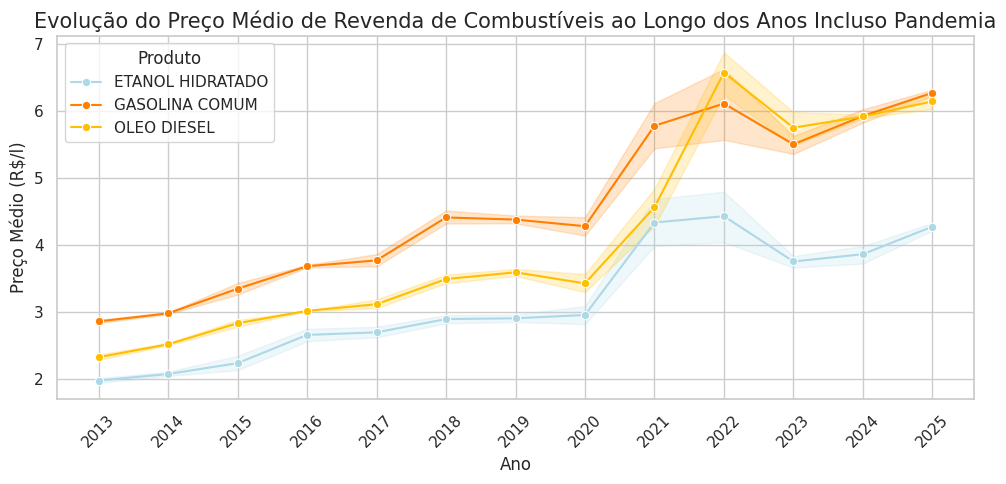

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.lineplot(data=df_tratado, x=df_tratado['ANO_SEP'].astype(str), y='PREÇO MÉDIO REVENDA', hue='PRODUTO', marker='o', palette=mapa_cores)

# Personaliza
plt.title('Evolução do Preço Médio de Revenda de Combustíveis ao Longo dos Anos Incluso Pandemia', size=15)
plt.xlabel('Ano')
plt.ylabel('Preço Médio (R$/l)')
plt.xticks(rotation=45)
plt.legend(title='Produto')
plt.tight_layout()
plt.show()

**Sem os dados da pandemia**

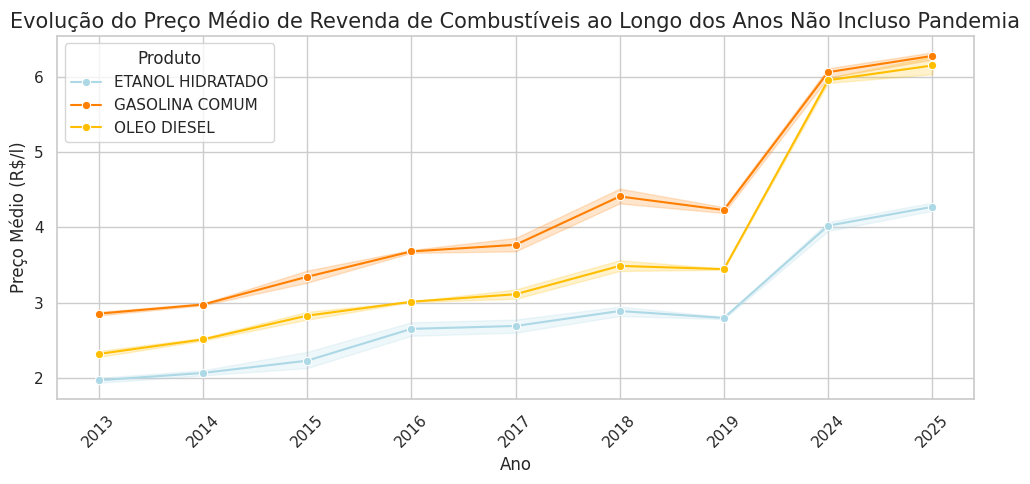

In [ ]:
# Gráfico do dataset sem a pandemia
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.lineplot(data=df_tratado_sp, x=df_tratado_sp['ANO_SEP'].astype(str), y='PREÇO MÉDIO REVENDA', hue='PRODUTO', marker='o', palette=mapa_cores)

plt.title('Evolução do Preço Médio de Revenda de Combustíveis ao Longo dos Anos Não Incluso Pandemia', size=15)
plt.xlabel('Ano')
plt.ylabel('Preço Médio (R$/l)')
plt.xticks(rotation=45)
plt.legend(title='Produto')
plt.tight_layout()
plt.show()

**Período da Pandemia**

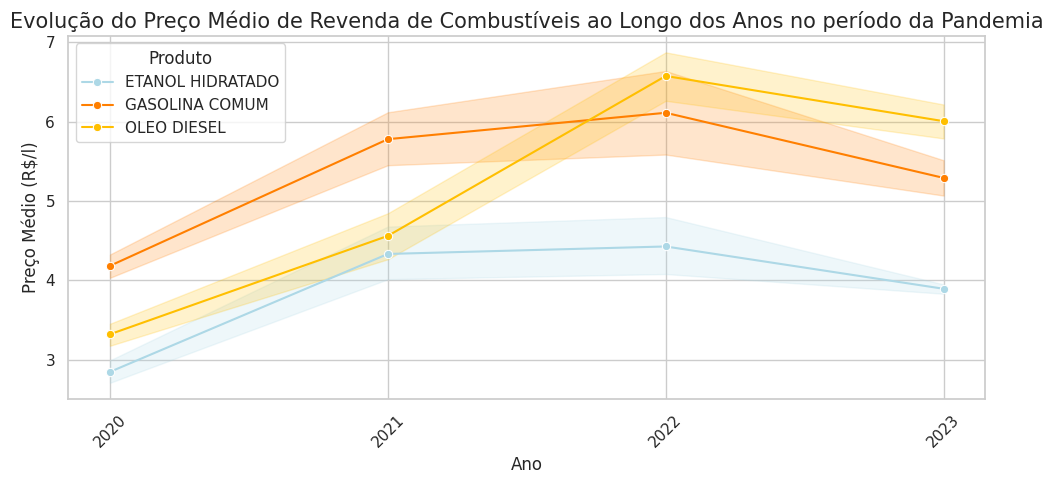

In [ ]:
# Gráfico do dataset do apenas com o período da pandemia
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.lineplot(data=df_periodo_pandemia, x=df_periodo_pandemia['ANO_SEP'].astype(str), y='PREÇO MÉDIO REVENDA', hue='PRODUTO', marker='o', palette=mapa_cores)

plt.title('Evolução do Preço Médio de Revenda de Combustíveis ao Longo dos Anos no período da Pandemia', size=15)
plt.xlabel('Ano')
plt.ylabel('Preço Médio (R$/l)')
plt.xticks(rotation=45)
plt.legend(title='Produto')
plt.tight_layout()
plt.show()

## Análise Exploratória

* Relação entre as variáveis
* Características (A variável é categórica ou numérica? Infinita ou finita?)
* Encontrar padrões nos dados
* Análise estatística com visualização (Medidas de tendência central, distribuição)

In [ ]:
round(df_tratado.describe(), 2)

,MÊS,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,COEF DE VARIAÇÃO REVENDA,ANO_SEP,MÊS_SEP
count,450,450.00,450.00,450.00,450.00,450.00,450.00,450.00,450.00
mean,2019-03-29 06:52:48.000000256,19893.26,3.88,0.32,3.09,5.51,0.09,2018.79,6.37
min,2013-01-01 00:00:00,681.00,1.90,0.11,1.26,2.95,0.04,2013.00,1.00
25%,2016-02-01 00:00:00,13475.75,2.86,0.22,2.26,4.17,0.06,2016.00,3.00
50%,2019-03-16 12:00:00,19149.50,3.60,0.31,2.89,4.99,0.07,2019.00,6.00
75%,2022-06-01 00:00:00,24762.00,4.62,0.40,3.70,6.90,0.12,2022.00,9.00
max,2025-07-01 00:00:00,42745.00,7.46,0.77,6.24,9.00,0.22,2025.00,12.00
std,NaN,8848.61,1.33,0.12,1.10,1.67,0.04,3.65,3.45


In [ ]:
round(df_tratado_sp.describe(), 2)

,MÊS,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,COEF DE VARIAÇÃO REVENDA,ANO_SEP,MÊS_SEP
count,264,264.00,264.00,264.00,264.00,264.00,264.00,264.00,264.00
mean,2017-06-17 02:10:54.545454592,22893.61,3.35,0.27,2.71,4.73,0.09,2017.01,6.39
min,2013-01-01 00:00:00,6728.00,1.90,0.11,1.26,2.95,0.05,2013.00,1.00
25%,2014-10-24 06:00:00,15639.75,2.60,0.17,2.03,3.70,0.06,2014.00,3.00
50%,2016-08-16 12:00:00,22728.00,2.99,0.25,2.48,4.33,0.06,2016.00,6.00
75%,2018-06-08 12:00:00,29116.50,3.71,0.35,3.08,4.96,0.12,2018.00,9.00
max,2025-07-01 00:00:00,42745.00,6.38,0.52,5.58,8.99,0.19,2025.00,12.00
std,NaN,9136.63,1.15,0.11,1.02,1.49,0.04,3.65,3.46


In [ ]:
round(df_periodo_pandemia.describe(), 2)

,MÊS,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,COEF DE VARIAÇÃO REVENDA,ANO_SEP,MÊS_SEP
count,108,108.00,108.00,108.00,108.00,108.00,108.00,108.00,108.00
mean,2014-06-16 12:00:00,13903.88,4.86,0.39,3.77,6.86,0.09,2021.33,6.36
min,2013-01-01 00:00:00,681.00,2.55,0.23,1.80,4.50,0.04,2020.00,1.00
25%,2013-09-23 12:00:00,8999.25,3.92,0.30,3.05,5.88,0.06,2021.00,3.75
50%,2014-06-16 00:00:00,13604.50,4.79,0.37,3.77,6.99,0.07,2021.00,6.00
75%,2015-03-08 18:00:00,18720.00,5.71,0.48,4.36,7.90,0.11,2022.00,9.25
max,2015-12-01 00:00:00,26424.00,7.46,0.77,6.24,9.00,0.22,2023.00,12.00
std,NaN,6336.42,1.26,0.12,1.03,1.24,0.04,0.95,3.47


### Análise de Têndencia e Série Temporal

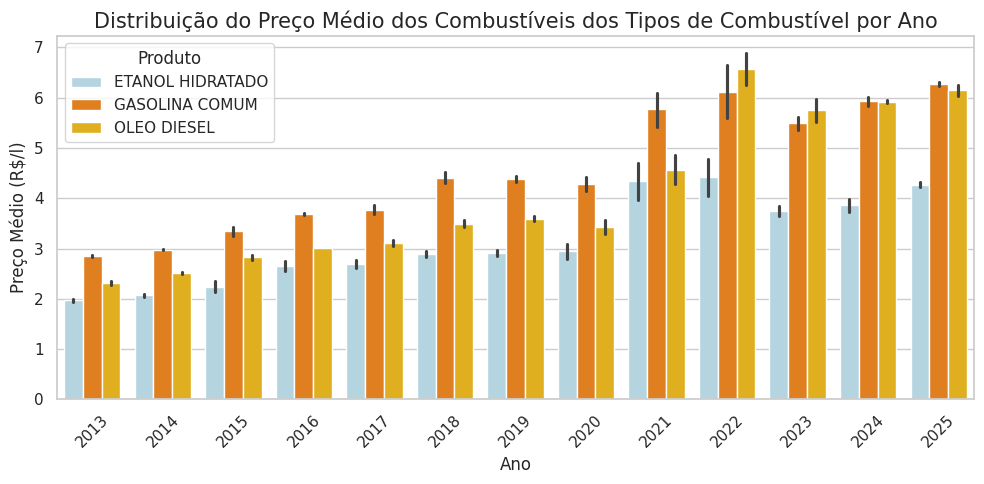

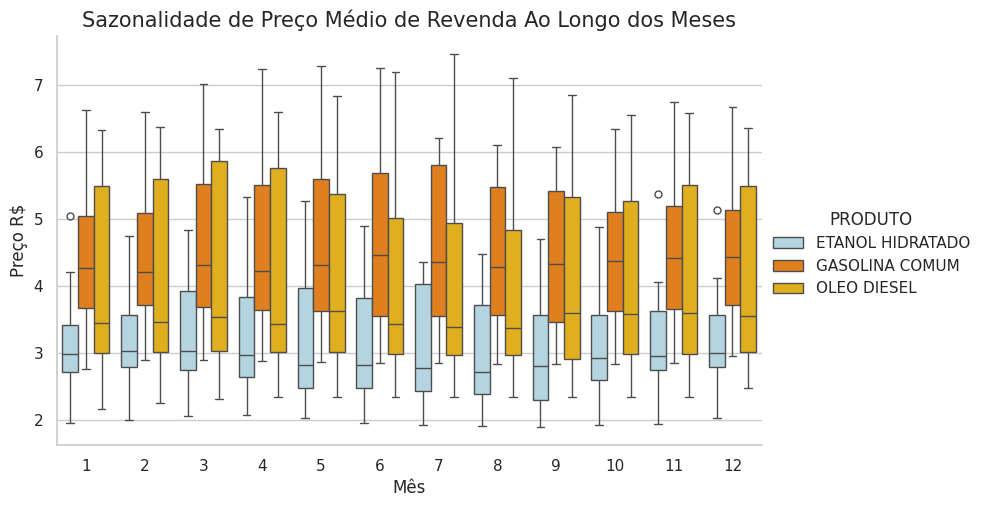

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de Barras para Preço médio por ano
plt.figure(figsize=(10,5))
sns.barplot(df_tratado, x="ANO_SEP", hue="PRODUTO", y="PREÇO MÉDIO REVENDA", palette=mapa_cores)
plt.title('Distribuição do Preço Médio dos Combustíveis dos Tipos de Combustível por Ano', size=15)
plt.xlabel('Ano')
plt.ylabel('Preço Médio (R$/l)')
plt.xticks(rotation=45)
plt.legend(title='Produto')
plt.tight_layout()
plt.show()

print()

# Boxplot de Preço médio por mês
sns.catplot(data=df_tratado, x="MÊS_SEP", y="PREÇO MÉDIO REVENDA", hue="PRODUTO", kind="box", height=5, aspect=1.6, palette=mapa_cores)
plt.title('Sazonalidade de Preço Médio de Revenda Ao Longo dos Meses', size=15)
plt.xlabel('Mês')
plt.ylabel('Preço R$')
plt.show()

### Comparação do Preço por Tipo de Combustível

In [ ]:
# Usando pivot_table para calcular o peso médio para cada produto por ano e mes
df_pivot_preco_medio_revenda = pd.pivot_table(df_tratado,
                                             values='PREÇO MÉDIO REVENDA',
                                             index=['MÊS_SEP', 'ANO_SEP'],
                                             columns='PRODUTO',
                                             aggfunc='mean')

# Calculando a razão dos preços
df_pivot_preco_medio_revenda['RAZAO_ETANOL_GASOLINA'] = df_pivot_preco_medio_revenda['ETANOL HIDRATADO'] / df_pivot_preco_medio_revenda['GASOLINA COMUM']

# Calculando a porcentagem da diferença
df_pivot_preco_medio_revenda['% RAZAO ETANOL_GASOLINA'] = df_pivot_preco_medio_revenda['RAZAO_ETANOL_GASOLINA'] * 100

display(df_pivot_preco_medio_revenda)

PRODUTO          ETANOL HIDRATADO  GASOLINA COMUM  OLEO DIESEL  \
MÊS_SEP ANO_SEP                                                  
1       2013                1.956           2.763        2.156   
        2014                2.047           2.956        2.485   
        2015                2.061           3.032        2.611   
        2016                2.718           3.676        3.003   
        2017                2.910           3.768        3.092   
...                           ...             ...          ...   
12      2020                3.179           4.483        3.606   
        2021                5.141           6.670        5.347   
        2022                3.840           4.970        6.360   
        2023                3.480           5.600        5.920   
        2024                4.110           6.140        6.030   

PRODUTO          RAZAO_ETANOL_GASOLINA  % RAZAO ETANOL_GASOLINA  
MÊS_SEP ANO_SEP                                                  
1       2013                  0.707926                70.792617  
        2014                  0.692490                69.248985  
        2015                  0.679749                67.974934  
        2016                  0.739391                73.939064  
        2017                  0.772293                77.229299  
...                                ...                      ...  
12      2020                  0.709123                70.912335  
        2021                  0.770765                77.076462  
        2022                  0.772636                77.263581  
        2023                  0.621429                62.142857  
        2024                  0.669381                66.938111  

[150 rows x 5 columns]

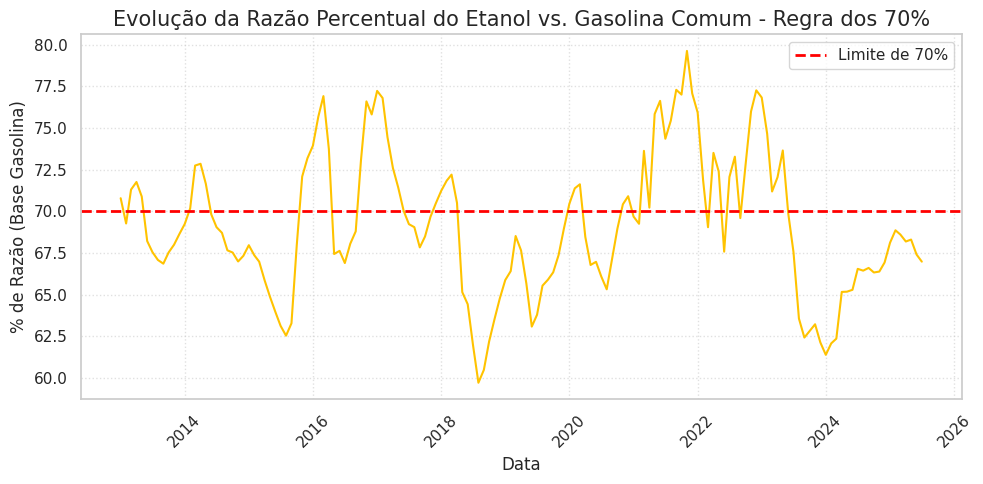

In [ ]:
# Gráfico mostrando a comparação da diferença absoluta dos combustíveis
df_plot = df_pivot_preco_medio_revenda.reset_index()

# Criar uma coluna de data unificada para plotagem
df_plot['DATA'] = pd.to_datetime(df_plot['ANO_SEP'].astype(str) + '-' + df_plot['MÊS_SEP'].astype(str))

# Gráfico de Linha para a Regra dos 70%
plt.figure(figsize=(10, 5))

# Diferença percentual Etanol/Gasolina
sns.lineplot(data=df_plot, x='DATA', y='% RAZAO ETANOL_GASOLINA', color='#FFC300')

# Adicionar a linha de referência da Regra dos 70% (30% de diferença ou menos)
# Se a diferença for < 70%, o etanol é vantajoso. Se for > 70%, a gasolina é vantajosa.
plt.axhline(70, color='red', linestyle='--', linewidth=2, label='Limite de 70%')

# Adicionar Rótulos e Título
plt.title('Evolução da Razão Percentual do Etanol vs. Gasolina Comum - Regra dos 70%', fontsize=15)
plt.xlabel('Data', fontsize=12)
plt.ylabel('% de Razão (Base Gasolina)', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Abaixo de 70%, o preço do Etanol representa menos de 70% do preço da Gasolina. Portanto, o etanol é mais vantajoso.
* Acima de 70%, o preço do Etanol representa mais de 70% do preço da Gasolina. Portanto, a gasolina compensa mais
* = 70%, indiferença energética

### Volatilidade e Risco

In [ ]:
mapa_cores = {
    'ETANOL HIDRATADO': '#008000', # Verde escuro
    'GASOLINA COMUM': '#DC143C',   # Vermelho carmesim
    'OLEO DIESEL': '#3A3A3A'
    }

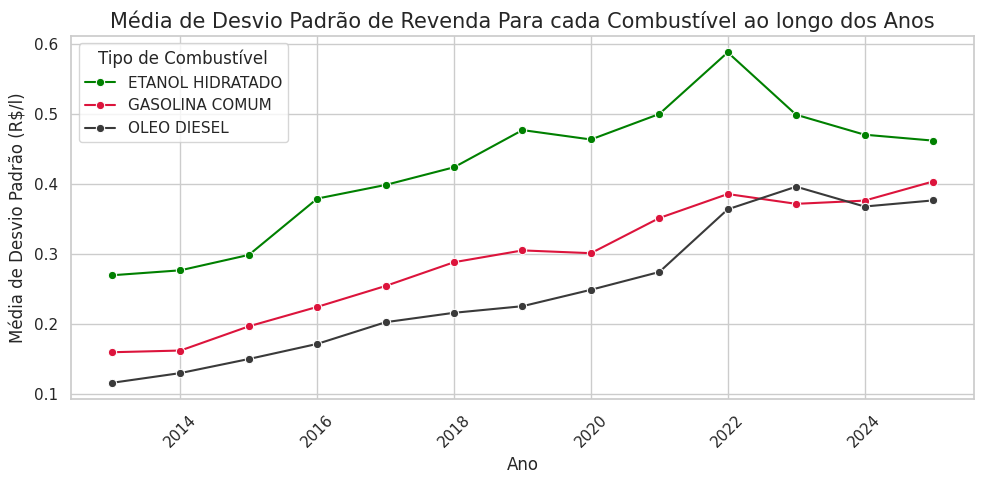

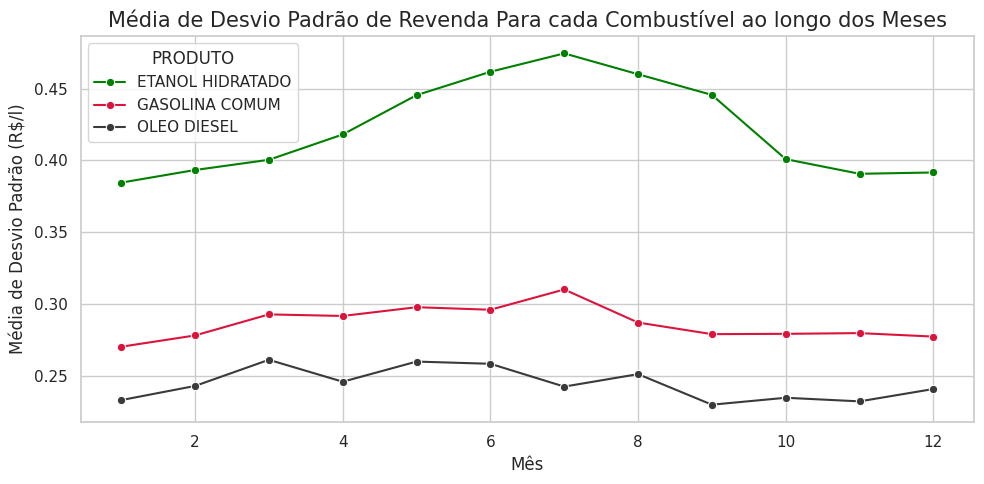

In [ ]:
# Desvio padrão dos preços em janelas de tempo - 30 dias/1 mês
# Criando novo dataset com as colunas necessárias para a análise
df_volatilidade = df_tratado[['PRODUTO', 'DESVIO PADRÃO REVENDA', 'ANO_SEP', 'MÊS_SEP']].copy()

# Agrupar por ano
df_agrupado_ano = df_volatilidade.groupby(['ANO_SEP', 'PRODUTO'])['DESVIO PADRÃO REVENDA'].mean().reset_index()
df_agrupado_ano.to_csv('agrupado_ano.csv')

# Agrupar por mês e produto
df_agrupado_mes = df_volatilidade.groupby(['MÊS_SEP', 'PRODUTO'])['DESVIO PADRÃO REVENDA'].mean().reset_index()
df_agrupado_mes.to_csv('agrupado_ano.csv')

# Gráfico de Linha para Desvio Padrão por ano
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_agrupado_ano, x='ANO_SEP', y='DESVIO PADRÃO REVENDA', hue='PRODUTO', marker='o', palette=mapa_cores)
plt.title('Média de Desvio Padrão de Revenda Para cada Combustível ao longo dos Anos', size=15)
plt.xlabel('Ano')
plt.ylabel('Média de Desvio Padrão (R$/l)')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Combustível')
plt.tight_layout()
plt.show()

print()

# Gráfico de Linha para Desvio Padrão por mês
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_agrupado_mes, x='MÊS_SEP', y='DESVIO PADRÃO REVENDA', hue='PRODUTO', marker='o', palette=mapa_cores)
plt.title('Média de Desvio Padrão de Revenda Para cada Combustível ao longo dos Meses', size=15)
plt.xlabel('Mês')
plt.ylabel('Média de Desvio Padrão (R$/l)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Desvio padrão próximo de 0 significa que os valores estão próximos da média e a volatilidade e risco é baixa

## Modelagem e Desenvolvimento

* Escolha do modelo adequado (pode ser mais que um)
* Escolha das variáveis
* Padronização dos dados
* Separação dos dados (entradas e saídas, treino e teste)
* Treinamento e avaliação (ajuste de hiperparâmetros, métricas de avaliação - acurácia, precisão...)
* Escolha do modelo com melhor performance e monitoramento

In [ ]:
#padronização dos dados
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# 2. Identificar a coluna e prepará-la para o scikit-learn
# O scikit-learn exige que os dados de entrada sejam um array 2D.
coluna_para_normalizar = "PREÇO MÉDIO REVENDA"
dados = df_tratado[[coluna_para_normalizar]] # Usando colchetes duplos já retorna um DataFrame (2D)

# --- 3. Normalização Min-Max (Escala entre 0 e 1) ---

# Cria o objeto scaler
#scaler_minmax = MinMaxScaler()

# Aplica o fit_transform: calcula os valores Mínimo e Máximo e transforma os dados
#df_tratado['PREÇO_MINMAX'] = scaler_minmax.fit_transform(dados)

# SALVAR O SCALER:
# É CRUCIAL SALVAR esse objeto 'scaler_minmax' para poder reverter
# a previsão para o preço real (R$/l) depois, usando a função .inverse_transform().
# Por exemplo, você pode usar a biblioteca pickle para salvar o objeto.


# --- 4. Padronização Z-Score (Média 0 e Desvio Padrão 1) ---

# Cria o objeto scaler
scaler_zscore = StandardScaler()

# Aplica o fit_transform: calcula a Média e o Desvio Padrão e transforma os dados
df_tratado['PREÇO_ZSCORE'] = scaler_zscore.fit_transform(dados)


# 5. Visualizar o resultado
#print("Comparação dos dados Original, Min-Max e Z-Score (Primeiras 5 linhas):")
#print(df_tratado[['PRODUTO', coluna_para_normalizar, 'PREÇO_MINMAX', 'PREÇO_ZSCORE']].head())
print(df_tratado[['PRODUTO', coluna_para_normalizar, 'PREÇO_ZSCORE']].head())




            PRODUTO  PREÇO MÉDIO REVENDA  PREÇO_ZSCORE
0  ETANOL HIDRATADO                1.956     -1.447283
1    GASOLINA COMUM                2.763     -0.841753
2       OLEO DIESEL                2.156     -1.297214
3  ETANOL HIDRATADO                2.000     -1.414268
4    GASOLINA COMUM                2.887     -0.748710


Por que salvar? Quando o seu modelo de previsão retornar um valor normalizado (por exemplo, um valor entre 0 e 1), você precisará do objeto scaler original para convertê-lo de volta para a unidade monetária real (R$/l) usando a função scaler.inverse_transform(). Sem ele, a previsão não tem valor prático.



In [ ]:
df_tratado.head()

,MÊS,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,COEF DE VARIAÇÃO REVENDA,ANO_SEP,MÊS_SEP,PREÇO_ZSCORE
0,2013-01-01,ETANOL HIDRATADO,39584,R$/l,1.956,0.244,1.479,3.120,0.125,2013,1,-1.447283
1,2013-01-01,GASOLINA COMUM,41990,R$/l,2.763,0.148,2.229,3.899,0.054,2013,1,-0.841753
2,2013-01-01,OLEO DIESEL,32749,R$/l,2.156,0.114,1.869,2.950,0.053,2013,1,-1.297214
3,2013-02-01,ETANOL HIDRATADO,32570,R$/l,2.000,0.239,1.480,3.150,0.120,2013,2,-1.414268
4,2013-02-01,GASOLINA COMUM,34664,R$/l,2.887,0.146,2.390,3.899,0.051,2013,2,-0.748710


Previsão Gasolina Comum

In [ ]:
#modelo SARINA -> mais utilizado para séries temporais
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
# Ignorar warnings de convergência do SARIMAX para fins de demonstração
warnings.filterwarnings("ignore")


# Instanciar e aplicar Padronização Z-Score na coluna "PREÇO MÉDIO REVENDA"
scaler_zscore = StandardScaler()
coluna_para_padronizar = "PREÇO MÉDIO REVENDA"
dados = df_tratado[[coluna_para_padronizar]]

# Cria a coluna PREÇO_ZSCORE (dados padronizados)
df_tratado['PREÇO_ZSCORE'] = scaler_zscore.fit_transform(dados)

# 2. Preparar a Série Temporal
# Converter a coluna 'MÊS' para datetime e ordenar
df_tratado['MÊS'] = pd.to_datetime(df_tratado['MÊS'])
df_tratado = df_tratado.sort_values(by='MÊS')

# 3. Escolher um produto para o exemplo e a coluna padronizada
PRODUTO_EXEMPLO = 'GASOLINA COMUM'
ts_gasolina = df_tratado[df_tratado['PRODUTO'] == PRODUTO_EXEMPLO].set_index('MÊS')['PREÇO_ZSCORE']

# 4. Dividir os dados em treino (todos exceto os últimos 3 meses)
tamanho_treino = len(ts_gasolina) - 3
train_data = ts_gasolina[:tamanho_treino]

# 5. Modelagem SARIMA (p, d, q) x (P, D, Q, s)
# Parâmetros de exemplo:
order = (1, 1, 0)        # Componente Não-Sazonal
seasonal_order = (0, 0, 0, 12) # Componente Sazonal (Período de 12 meses)

print(f"Ajustando Modelo SARIMA para o produto: {PRODUTO_EXEMPLO}...")

try:
    # Ajustar o modelo aos dados de treino
    model = SARIMAX(train_data,
                    order=order,
                    seasonal_order=seasonal_order,
                    enforce_stationarity=False,
                    enforce_invertibility=False)

    model_fit = model.fit(disp=False)

    # 6. Previsão para os próximos 3 meses
    steps_to_forecast = 3
    previsao_zscore = model_fit.forecast(steps=steps_to_forecast)

    # 7. Inverter a transformação (CRUCIAL):
    # Converte os valores previstos do Z-Score de volta para R$/l
    # O .values.reshape(-1, 1) é necessário para o inverse_transform
    previsao_reais = scaler_zscore.inverse_transform(previsao_zscore.values.reshape(-1, 1))

    # 8. Criar DataFrame de resultados para visualização
    datas_finais = pd.date_range(start=ts_gasolina.index[-1] + pd.DateOffset(months=1),
                                 periods=steps_to_forecast,
                                 freq='MS')

    df_previsao = pd.DataFrame({'MÊS': datas_finais, 'PREVISÃO (R$/l)': previsao_reais.flatten()})

    print(f"\nModelo SARIMA ({order})x({seasonal_order}) ajustado com sucesso.")
    print("\nPrevisão dos próximos 3 meses (PREÇO MÉDIO REVENDA em R$/l):")
    # Imprime a tabela de resultados
    print(df_previsao.to_markdown(index=False, numalign="left", stralign="left"))

except Exception as e:
    print(f"Erro ao ajustar o modelo SARIMA: {e}")

Ajustando Modelo SARIMA para o produto: GASOLINA COMUM...

Modelo SARIMA ((1, 1, 0))x((0, 0, 0, 12)) ajustado com sucesso.

Previsão dos próximos 3 meses (PREÇO MÉDIO REVENDA em R$/l):
| MÊS                 | PREVISÃO (R$/l)   |
|:--------------------|:------------------|
| 2025-08-01 00:00:00 | 6.3108            |
| 2025-09-01 00:00:00 | 6.30657           |
| 2025-10-01 00:00:00 | 6.30462           |


In [ ]:
# Ignorar warnings de convergência do SARIMAX durante o grid search
warnings.filterwarnings("ignore")

# 1. Carregar e Preparar os Dados (Reaplica Padronização Z-Score)
df_tradado = pd.read_csv("precos_tratado.csv")
scaler_zscore = StandardScaler()
dados = df_tradado[["PREÇO MÉDIO REVENDA"]]
df_tradado['PREÇO_ZSCORE'] = scaler_zscore.fit_transform(dados)
df_tradado['MÊS'] = pd.to_datetime(df_tradado['MÊS'])
df_tradado = df_tradado.sort_values(by='MÊS')

# 2. Definir a Série Temporal (Exemplo: GASOLINA COMUM)
PRODUTO_EXEMPLO = 'GASOLINA COMUM'
ts = df_tradado[df_tradado['PRODUTO'] == PRODUTO_EXEMPLO].set_index('MÊS')['PREÇO_ZSCORE']

# Usaremos apenas os dados de treino, mas aqui usaremos a série completa para encontrar o modelo ideal
train_data = ts

# 3. Definir o Espaço de Parâmetros para o Grid Search
# p, d, q: ordens não-sazonais (AR, I, MA)
p = d = q = range(0, 2)  # 0 ou 1
# P, D, Q: ordens sazonais (SAR, SI, SMA)
P = D = Q = range(0, 2)  # 0 ou 1
s = 12                   # Sazonalidade (12 meses)

# Gerar todas as combinações de parâmetros
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, [s]))

# 4. Rodar o Grid Search
best_aic = np.inf
best_order = None
best_seasonal_order = None

print("Iniciando Grid Search para encontrar os melhores parâmetros SARIMA...")

for order in pdq:
    for seasonal_order in seasonal_pdq:
        try:
            # Tentar ajustar o modelo
            model = SARIMAX(train_data,
                            order=order,
                            seasonal_order=seasonal_order,
                            enforce_stationarity=False,
                            enforce_invertibility=False)

            results = model.fit(disp=False)

            # Se o AIC for menor, atualizar o melhor modelo
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = order
                best_seasonal_order = seasonal_order

        except:
            # Pular combinações que falham ao ajustar
            continue

# 5. Imprimir os Melhores Resultados
print("\n--- Resultados do Grid Search ---")
print(f"Melhor Parâmetro (Não-Sazonal): {best_order}")
print(f"Melhor Parâmetro (Sazonal): {best_seasonal_order}")
print(f"Melhor AIC (Akaike Information Criterion): {best_aic:.2f}")

# Exemplo de como você usaria o melhor modelo:
# best_model = SARIMAX(train_data, order=best_order, seasonal_order=best_seasonal_order)
# best_model_fit = best_model.fit(disp=False)

Iniciando Grid Search para encontrar os melhores parâmetros SARIMA...

--- Resultados do Grid Search ---
Melhor Parâmetro (Não-Sazonal): (1, 1, 0)
Melhor Parâmetro (Sazonal): (0, 0, 0, 12)
Melhor AIC (Akaike Information Criterion): -219.78


In [ ]:
# Valores Reais (y_true) fornecidos pelo usuário para Ago, Set e Out (R$/l)
y_true = np.array([6.19, 6.19, 6.38])

# Valores Previstos (y_pred) do modelo SARIMA (R$/l)
y_pred = np.array([6.3108, 6.30657, 6.30462])


# 1. Erro Absoluto Médio (MAE)
def calculate_mae(y_true, y_pred):
    """Calcula o Erro Absoluto Médio (MAE)"""
    return np.mean(np.abs(y_true - y_pred))

# 2. Erro Quadrático Médio (MSE)
def calculate_mse(y_true, y_pred):
    """Calcula o Erro Quadrático Médio (MSE)"""
    return np.mean((y_true - y_pred)**2)

# 3. Erro Percentual Absoluto Médio (MAPE)
def calculate_mape(y_true, y_pred):
    """Calcula o Erro Percentual Absoluto Médio (MAPE) em %"""
    # np.where é usado para evitar divisão por zero, caso algum preço real fosse 0
    return np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, 1, y_true))) * 100


mae = calculate_mae(y_true, y_pred)
mse = calculate_mse(y_true, y_pred)
mape = calculate_mape(y_true, y_pred)

print("--- Métricas de Erro (Gasolina Comum) ---")
print(f"Valores Reais (y_true): {y_true}")
print(f"Valores Previstos (y_pred): {y_pred}")
print("\n--- Resultados ---")
print(f"1. Erro Absoluto Médio (MAE): {mae:.4f} R$/l")
print(f"2. Erro Quadrático Médio (MSE): {mse:.4f} (R$/l)²")
print(f"3. Erro Percentual Absoluto Médio (MAPE): {mape:.2f}%")

--- Métricas de Erro (Gasolina Comum) ---
Valores Reais (y_true): [6.19 6.19 6.38]
Valores Previstos (y_pred): [6.3108  6.30657 6.30462]

--- Resultados ---
1. Erro Absoluto Médio (MAE): 0.1042 R$/l
2. Erro Quadrático Médio (MSE): 0.0113 (R$/l)²
3. Erro Percentual Absoluto Médio (MAPE): 1.67%


PREVISÃO PARA ETANOL HIDRATADO

In [ ]:
warnings.filterwarnings("ignore")

# Instanciar e aplicar Padronização Z-Score na coluna "PREÇO MÉDIO REVENDA"
scaler_zscore = StandardScaler()
coluna_para_padronizar = "PREÇO MÉDIO REVENDA"
dados = df_tratado[[coluna_para_padronizar]]

# Cria a coluna PREÇO_ZSCORE (dados padronizados)
df_tratado['PREÇO_ZSCORE'] = scaler_zscore.fit_transform(dados)

# 2. Preparar a Série Temporal
# Converter a coluna 'MÊS' para datetime e ordenar
df_tratado['MÊS'] = pd.to_datetime(df_tratado['MÊS'])
df_tratado = df_tratado.sort_values(by='MÊS')

# 3. Escolher um produto para o exemplo e a coluna padronizada
PRODUTO_EXEMPLO = 'ETANOL HIDRATADO'
ts_gasolina = df_tratado[df_tratado['PRODUTO'] == PRODUTO_EXEMPLO].set_index('MÊS')['PREÇO_ZSCORE']

# 4. Dividir os dados em treino (todos exceto os últimos 3 meses)
tamanho_treino = len(ts_gasolina) - 3
train_data = ts_gasolina[:tamanho_treino]

# 5. Modelagem SARIMA (p, d, q) x (P, D, Q, s)
# Parâmetros de exemplo:
order = (2, 0, 0)        # Componente Não-Sazonal
seasonal_order = (0, 0, 0, 12) # Componente Sazonal (Período de 12 meses)

print(f"Ajustando Modelo SARIMA para o produto: {PRODUTO_EXEMPLO}...")

try:
    # Ajustar o modelo aos dados de treino
    model = SARIMAX(train_data,
                    order=order,
                    seasonal_order=seasonal_order,
                    enforce_stationarity=False,
                    enforce_invertibility=False)

    model_fit = model.fit(disp=False)

    # 6. Previsão para os próximos 3 meses
    steps_to_forecast = 3
    previsao_zscore = model_fit.forecast(steps=steps_to_forecast)

    # 7. Inverter a transformação (CRUCIAL):
    # Converte os valores previstos do Z-Score de volta para R$/l
    # O .values.reshape(-1, 1) é necessário para o inverse_transform
    previsao_reais = scaler_zscore.inverse_transform(previsao_zscore.values.reshape(-1, 1))

    # 8. Criar DataFrame de resultados para visualização
    datas_finais = pd.date_range(start=ts_gasolina.index[-1] + pd.DateOffset(months=1),
                                 periods=steps_to_forecast,
                                 freq='MS')

    df_previsao = pd.DataFrame({'MÊS': datas_finais, 'PREVISÃO (R$/l)': previsao_reais.flatten()})

    print(f"\nModelo SARIMA ({order})x({seasonal_order}) ajustado com sucesso.")
    print("\nPrevisão dos próximos 3 meses (PREÇO MÉDIO REVENDA em R$/l):")
    # Imprime a tabela de resultados
    print(df_previsao.to_markdown(index=False, numalign="left", stralign="left"))

except Exception as e:
    print(f"Erro ao ajustar o modelo SARIMA: {e}")

Ajustando Modelo SARIMA para o produto: ETANOL HIDRATADO...

Modelo SARIMA ((2, 0, 0))x((0, 0, 0, 12)) ajustado com sucesso.

Previsão dos próximos 3 meses (PREÇO MÉDIO REVENDA em R$/l):
| MÊS                 | PREVISÃO (R$/l)   |
|:--------------------|:------------------|
| 2025-08-01 00:00:00 | 4.29009           |
| 2025-09-01 00:00:00 | 4.27681           |
| 2025-10-01 00:00:00 | 4.26584           |


In [ ]:
# Valores Reais (y_true) fornecidos pelo usuário para Ago, Set e Out (R$/l)
y_true = np.array([4.17, 4.26, 4.45])

# Valores Previstos (y_pred) do modelo SARIMA (R$/l)
y_pred = np.array([4.29009 , 4.27681, 4.26584])

# 1. Erro Absoluto Médio (MAE)
def calculate_mae(y_true, y_pred):
    """Calcula o Erro Absoluto Médio (MAE)"""
    return np.mean(np.abs(y_true - y_pred))

# 2. Erro Quadrático Médio (MSE)
def calculate_mse(y_true, y_pred):
    """Calcula o Erro Quadrático Médio (MSE)"""
    return np.mean((y_true - y_pred)**2)

# 3. Erro Percentual Absoluto Médio (MAPE)
def calculate_mape(y_true, y_pred):
    """Calcula o Erro Percentual Absoluto Médio (MAPE) em %"""
    # np.where é usado para evitar divisão por zero, caso algum preço real fosse 0
    return np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, 1, y_true))) * 100


mae = calculate_mae(y_true, y_pred)
mse = calculate_mse(y_true, y_pred)
mape = calculate_mape(y_true, y_pred)

print("--- Métricas de Erro (Gasolina Comum) ---")
print(f"Valores Reais (y_true): {y_true}")
print(f"Valores Previstos (y_pred): {y_pred}")
print("\n--- Resultados ---")
print(f"1. Erro Absoluto Médio (MAE): {mae:.4f} R$/l")
print(f"2. Erro Quadrático Médio (MSE): {mse:.4f} (R$/l)²")
print(f"3. Erro Percentual Absoluto Médio (MAPE): {mape:.2f}%")

--- Métricas de Erro (Gasolina Comum) ---
Valores Reais (y_true): [4.17 4.26 4.45]
Valores Previstos (y_pred): [4.29009 4.27681 4.26584]

--- Resultados ---
1. Erro Absoluto Médio (MAE): 0.1070 R$/l
2. Erro Quadrático Médio (MSE): 0.0162 (R$/l)²
3. Erro Percentual Absoluto Médio (MAPE): 2.47%


# PREVISÃO DIESEL

In [ ]:
warnings.filterwarnings("ignore")

# Instanciar e aplicar Padronização Z-Score na coluna "PREÇO MÉDIO REVENDA"
scaler_zscore = StandardScaler()
coluna_para_padronizar = "PREÇO MÉDIO REVENDA"
dados = df_tratado[[coluna_para_padronizar]]

# Cria a coluna PREÇO_ZSCORE (dados padronizados)
df_tratado['PREÇO_ZSCORE'] = scaler_zscore.fit_transform(dados)

# 2. Preparar a Série Temporal
# Converter a coluna 'MÊS' para datetime e ordenar
df_tratado['MÊS'] = pd.to_datetime(df_tratado['MÊS'])
df_tratado = df_tratado.sort_values(by='MÊS')

# 3. Escolher um produto para o exemplo e a coluna padronizada
PRODUTO_EXEMPLO = 'OLEO DIESEL'
ts_gasolina = df_tratado[df_tratado['PRODUTO'] == PRODUTO_EXEMPLO].set_index('MÊS')['PREÇO_ZSCORE']

# 4. Dividir os dados em treino (todos exceto os últimos 3 meses)
tamanho_treino = len(ts_gasolina) - 3
train_data = ts_gasolina[:tamanho_treino]

# 5. Modelagem SARIMA (p, d, q) x (P, D, Q, s)
# Parâmetros de exemplo:
order = (2, 0, 0)        # Componente Não-Sazonal
seasonal_order = (0, 0, 0, 12) # Componente Sazonal (Período de 12 meses)

print(f"Ajustando Modelo SARIMA para o produto: {PRODUTO_EXEMPLO}...")

try:
    # Ajustar o modelo aos dados de treino
    model = SARIMAX(train_data,
                    order=order,
                    seasonal_order=seasonal_order,
                    enforce_stationarity=False,
                    enforce_invertibility=False)

    model_fit = model.fit(disp=False)

    # 6. Previsão para os próximos 3 meses
    steps_to_forecast = 3
    previsao_zscore = model_fit.forecast(steps=steps_to_forecast)

    # 7. Inverter a transformação (CRUCIAL):
    # Converte os valores previstos do Z-Score de volta para R$/l
    # O .values.reshape(-1, 1) é necessário para o inverse_transform
    previsao_reais = scaler_zscore.inverse_transform(previsao_zscore.values.reshape(-1, 1))

    # 8. Criar DataFrame de resultados para visualização
    datas_finais = pd.date_range(start=ts_gasolina.index[-1] + pd.DateOffset(months=1),
                                 periods=steps_to_forecast,
                                 freq='MS')

    df_previsao = pd.DataFrame({'MÊS': datas_finais, 'PREVISÃO (R$/l)': previsao_reais.flatten()})

    print(f"\nModelo SARIMA ({order})x({seasonal_order}) ajustado com sucesso.")
    print("\nPrevisão dos próximos 3 meses (PREÇO MÉDIO REVENDA em R$/l):")
    # Imprime a tabela de resultados
    print(df_previsao.to_markdown(index=False, numalign="left", stralign="left"))

except Exception as e:
    print(f"Erro ao ajustar o modelo SARIMA: {e}")

Ajustando Modelo SARIMA para o produto: OLEO DIESEL...

Modelo SARIMA ((2, 0, 0))x((0, 0, 0, 12)) ajustado com sucesso.

Previsão dos próximos 3 meses (PREÇO MÉDIO REVENDA em R$/l):
| MÊS                 | PREVISÃO (R$/l)   |
|:--------------------|:------------------|
| 2025-08-01 00:00:00 | 6.14088           |
| 2025-09-01 00:00:00 | 6.08727           |
| 2025-10-01 00:00:00 | 6.04657           |


## Visualização de Dados

* Escolha dos gráficos
* Personalização dos gráficos
* Informações mais relevantes

## App Streamlit

* Montar a estrutura do aplicativo
* Inserir os gráficos e resultado do modelo
* Subir no GitHub
* Postar no Streamlit Community Cloud